In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
dataset = pd.read_csv("amazon_alexa.tsv", sep="\t")

In [6]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
#creating text length to check words in the text
dataset['text length'] = dataset['verified_reviews'].apply(len)

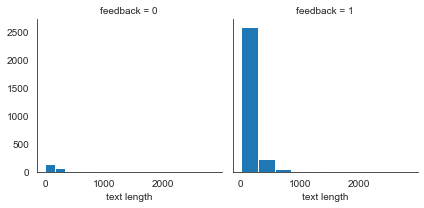

In [10]:
#histogram based on the text length
g = sns.FacetGrid(dataset,col='feedback')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='feedback', ylabel='text length'>

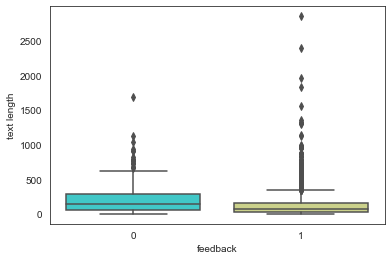

In [11]:
#box blot of text length for each feedback score
sns.boxplot(x='feedback',y='text length',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='feedback', ylabel='count'>

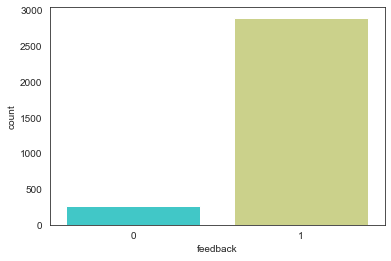

In [12]:
sns.countplot(x='feedback',data=dataset,palette='rainbow')

In [13]:
# groupby to get the mean of the numerical 
feedback = dataset.groupby('feedback').mean()
feedback

,rating,text length
feedback,,
0,1.373541,215.241245
1,4.737643,124.659177


<AxesSubplot:>

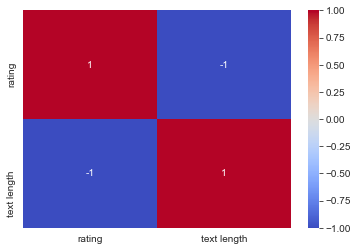

In [14]:
#correlation map
sns.heatmap(feedback.corr(),cmap='coolwarm',annot=True)

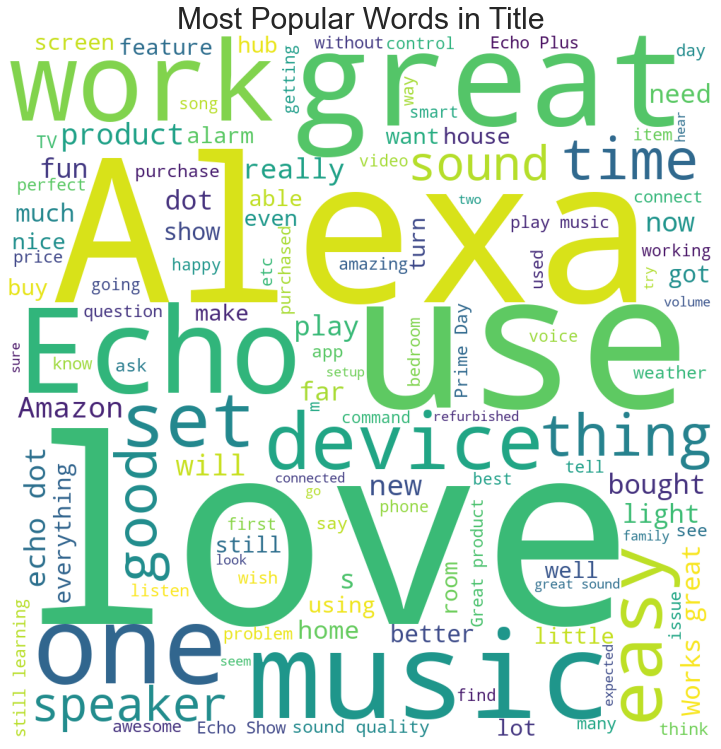

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(' '.join(dataset['verified_reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

In [16]:
# setting feature and goal
X = dataset['verified_reviews']
y = dataset['feedback']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [18]:
X = cv.fit_transform(X)

In [19]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [20]:
# train naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [21]:
predictions = nb.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 18  52]
 [ 13 862]]


              precision    recall  f1-score   support

           0       0.58      0.26      0.36        70
           1       0.94      0.99      0.96       875

    accuracy                           0.93       945
   macro avg       0.76      0.62      0.66       945
weighted avg       0.92      0.93      0.92       945



In [24]:
#using Tfidf with pipeline
from sklearn.feature_extraction.text import  TfidfTransformer

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
# creating the pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors 
])

In [27]:
# resplitting again since we are using pipe line
X = dataset['verified_reviews']
y = dataset['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [28]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [29]:
predictions = pipeline.predict(X_test)

In [30]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0  70]
 [  1 874]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.93      1.00      0.96       875

    accuracy                           0.92       945
   macro avg       0.46      0.50      0.48       945
weighted avg       0.86      0.92      0.89       945

